In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sad-and-happy-face-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3105538%2F5348785%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240418%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240418T035903Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2527a52b93901df8bcfd00ef56823abb1b4b7b53d8a212dd798b612576f37bb953f5b6516f87809c21a2323ede789d8a55445f101f5229396cb44231e71fecb255ddd82243d10bce2e328747380b66dea18bf20b117613ca66c57e2764c6a13778ea09622f70fe5b683e069322310cc9152cb7d85165101b7d4f58d1699ef600bd13e6af6efd0d68b597f4ddba16077602e9fdd977b994c29ed525f2fe6469da63e2ca0c3ce2eab6029f5e406e6883a89bdf92af551f46f54ec2cd12c111acd2ba4e05bdfde42b80eacf40c769dd7e369d0d547b05164b622f6db6ca43219f64ca2eff49c1c73b64c861320654ffaa786d5a250217d60fd052e47350ade23a12'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 233086881 bytes downloaded
Downloaded and uncompressed: sad-and-happy-face-detection
Data source import complete.


<div style="background-color:#FFFFF; padding:20px;">
    <Center><h1 style="color:#FF7F50;">Image Classification for Sad and Happy Faces</h1></center>
</div>

<div style="background-color:#FCE5CD; padding:20px;">
<p style="color:#FF7F50;"><strong>Project Overview</strong></p>
<p>The objective of this project is to create a model that can automatically detect and classify sad and happy faces in images. By training a deep learning model using a dataset of labeled facial expressions, we can teach the model to recognize patterns and features indicative of different emotions. The model will be built using Convolutional Neural Network (CNN) architecture.
</div>

<div style="background-color:#FFF3B0; padding:20px;">
<p style="color:#FF7F50;"><strong>Dataset</strong></p>
<p>To train our image classification model, we will utilize a carefully curated dataset consisting of labeled images containing sad and happy faces. The dataset will be preprocessed and split into training and testing sets to evaluate the model's performance accurately. Augmentation techniques may also be applied to increase the dataset's diversity and enhance the model's ability to generalize.</p>
</div>

##importing the required libraries:


tensorflow :
popular deep learning framework used for building and training neural networks

pandas : data manipulation library

matplotlib : a library used for dat visulaization

OpenCV (cv2) : used for image processing

imghdr : used for determining the type of image file as (JPG,
BMP,JPEG, PNG, GIF,..etc)


os : used for file and directory and process operations

numpy : used for numerical computations



In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib as mp
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

Assigns the variable data_dir to the entire images we are working on


In [ ]:
data_dir = 'data'

This to filter images and take only images with these extensions to further analsys and processing

In [ ]:
image_exts = ['jpeg' , 'jpg' ,'bmp' , 'png']

Accessing the data directory and all its content, apparently we have two files one for sad images and the other for happy ones


In [ ]:
os.listdir('/kaggle/input/sad-and-happy-face-detection/data')

['sad', 'happy']

Filtering Images by Extension
this snippet of code iterates over the entire images to take only images with the defined extensions 'jpeg','jpg', 'bmp', 'png', and neglect other extensions.
*cv2.imread(image_path)* is used to read the image and the *imghdr.what(image_path)* function is used to determine the image's format.
in case the extension is undefined print the errpr message defined below and remove the image

In [ ]:
data_dir = '/kaggle/input/sad-and-happy-face-detection/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Creating Image Dataset, this code demonstrates how to create an image dataset from a directory using the TensorFlow Keras library.

Here's how it works:  *tf.keras.utils.image_dataset_from_directory* this function take the data from directory then creating a labeled dataset, it takes the labeled subcategories then labels the dataset into (happy,sad) categories.

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/sad-and-happy-face-detection/data')


Found 1988 files belonging to 2 classes.


Creating Data Iterator, this to iterate over the dataset and retrive it as batches of data in the form of numpy array each element in the batch represents as a tuple an image and its corresponding label, this conversion to numpy array is to get numerical computing and processing for the images which is more powerful in python.

In [ ]:
data_iterator = data.as_numpy_iterator()

Getting a batch of data, next() method to get the next batch of data from the iterator.

In [ ]:
batch = data_iterator.next()

Displaying a Selection of Images, *fig* represents the entire window aka canvas, *ax* represents the images, so this snippet of code is to represnt subplot grid with 5 columns and 4 rows, displaying a grid of 20 images, with each image labeled according to the corresponding label in the batch

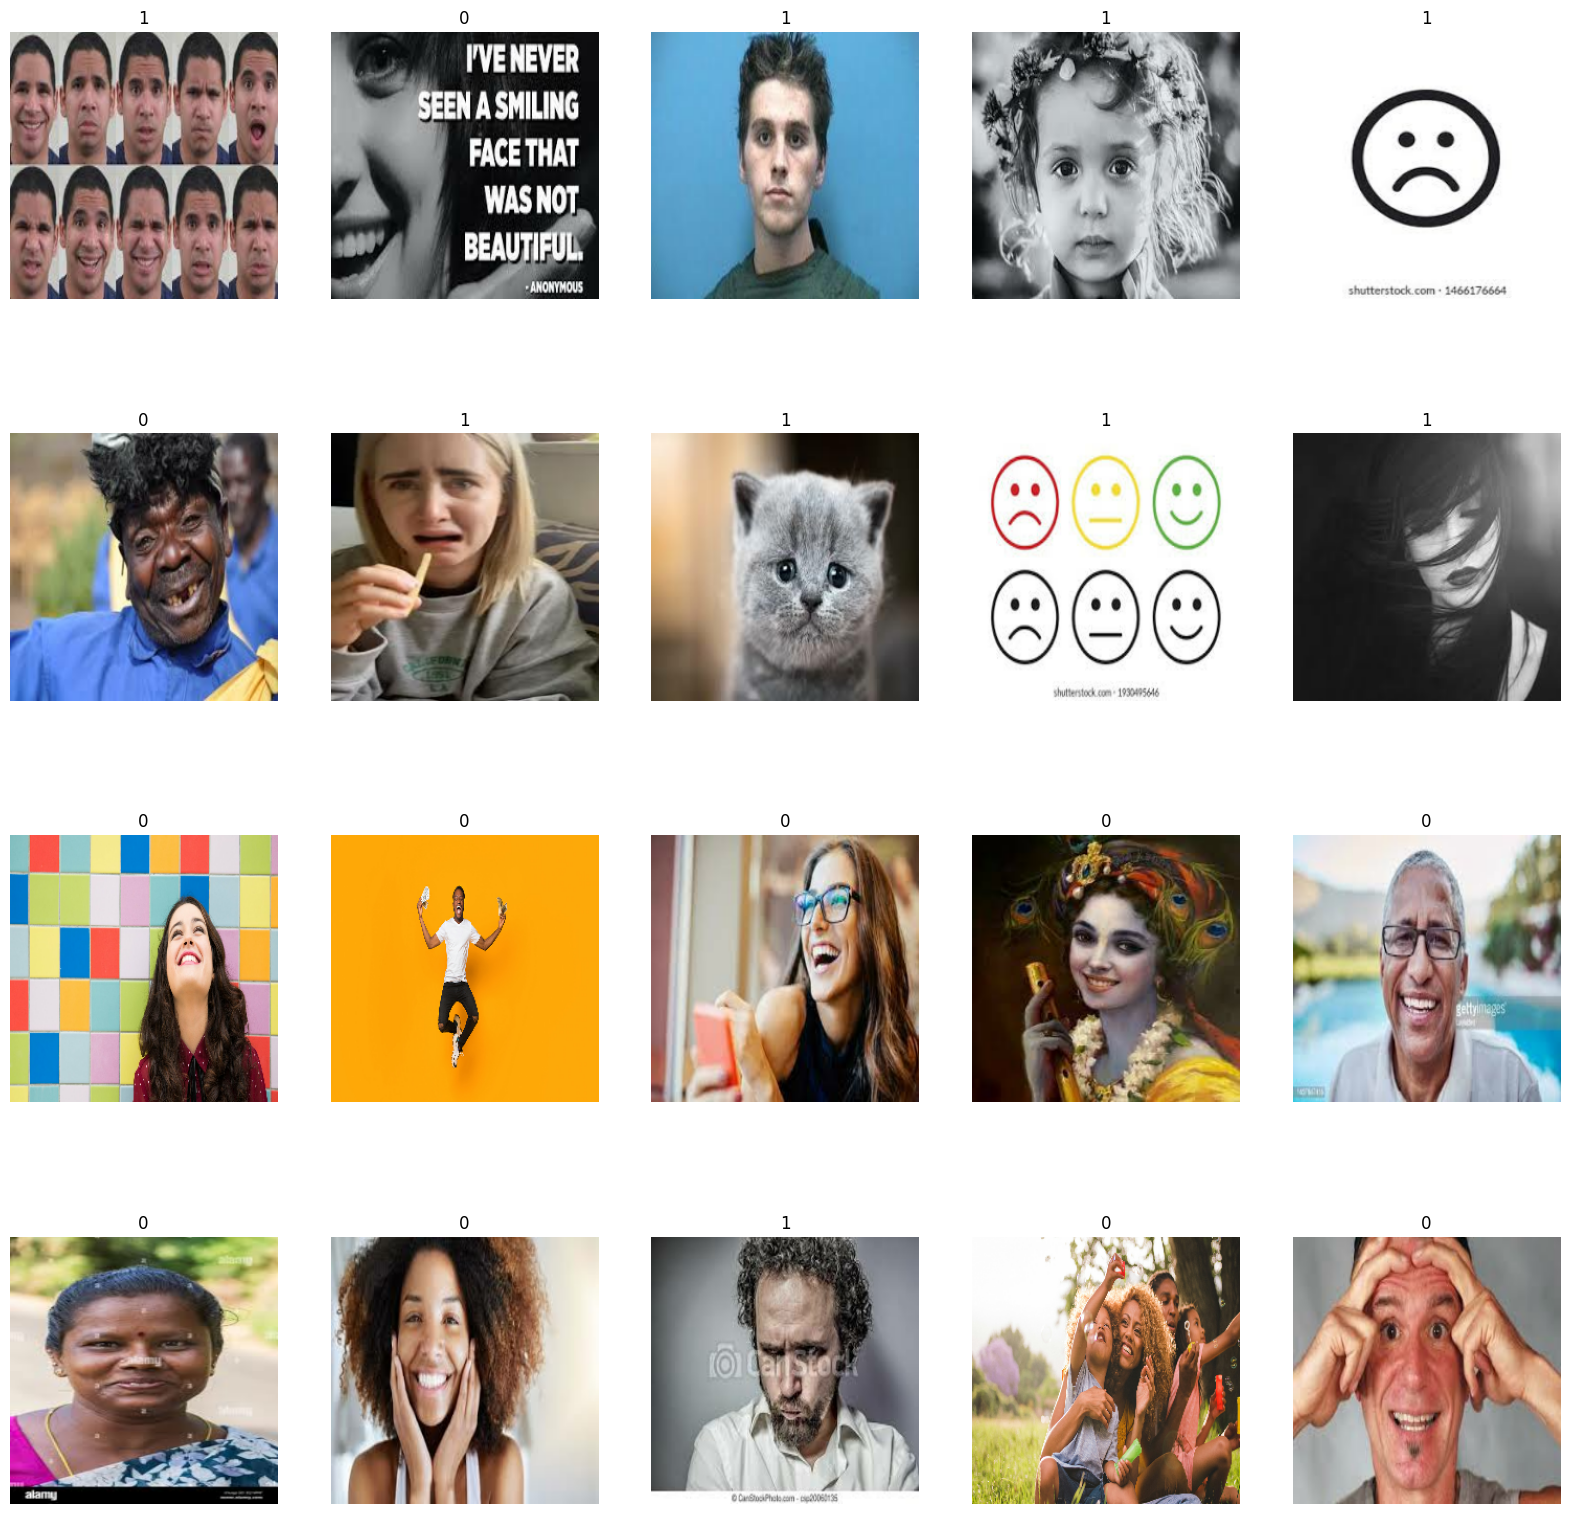

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx//5, idx%5].imshow(img.astype(int))
    ax[idx//5, idx%5].title.set_text(batch[1][idx])
    ax[idx//5, idx%5].axis('off')

Applying Normalization to Image Data, we ensure that all the pixel values are within a consistent range to make sure that all image contributing in the training process.

In [ ]:
data = data.map(lambda x,y: (x/255,y))

Converting Data to Numpy Array, to enhance image processing

In [ ]:
data.as_numpy_iterator().next()


(array([[[[0.972549  , 0.6392157 , 0.7294118 ],
          [0.9729856 , 0.6383425 , 0.7289752 ],
          [0.97574294, 0.6306449 , 0.72476256],
          ...,
          [0.96005666, 0.6135034 , 0.7090763 ],
          [0.9607843 , 0.6156863 , 0.70980394],
          [0.9607843 , 0.6156863 , 0.70980394]],
 
         [[0.97246575, 0.64137655, 0.7315726 ],
          [0.9704916 , 0.63859236, 0.7289752 ],
          [0.9712546 , 0.6328891 , 0.72476256],
          ...,
          [0.96005666, 0.6135034 , 0.7090763 ],
          [0.9607843 , 0.6156863 , 0.70980394],
          [0.9607843 , 0.6156863 , 0.70980394]],
 
         [[0.97015166, 0.64636946, 0.7343137 ],
          [0.966501  , 0.6420315 , 0.7301011 ],
          [0.96677387, 0.63681835, 0.7258885 ],
          ...,
          [0.9598478 , 0.61371225, 0.7090763 ],
          [0.9607843 , 0.6156863 , 0.70980394],
          [0.9607843 , 0.6156863 , 0.70980394]],
 
         ...,
 
         [[0.9027957 , 0.36191022, 0.5030867 ],
          [0.89437

Splitting the Data into Train, Validation, and Test Sets, 70% of the data for training, 20% for validation and 10% for test

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

Splitting the Data into Train, Validation, and Test Sets, assign the train, validation and test into variables we use take() and skip() methods to avoid overlapping between each data group

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Importing Required Modules these modules are the building blocks of the model**

conv2D: this is the fundamental layer, responsible for relevant features extraction, in other words it gather the simolar features from the input data.


maxpooling2D: this layer is responsible for dimension reducrion, it reduces the dimension of the images ( hight, width) without affecting image quality.

dense: it connects the neurons from the previous layers with neurons in the current layer.

flatten: converts the input data into 1D array, before passing the data to dense layer.






In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten

this is the first step to create a sequantial model, it acts as a container for the other layers will be added

In [ ]:
model = Sequential()

##Building the Convolutional Neural Network (CNN) Architecture



In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

The provided code snippet demonstrates the process of building a Convolutional Neural Network (CNN) architecture using the Sequential model from TensorFlow Keras. The architecture consists of several convolutional, pooling, and dense layers.

Here's an explanation of each line of code:

*model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))*
This line adds a Conv2D layer to the model with 16 filters these filters provides a deep understanding of the image as ( edge detection, texture detection then feature abstraction), a filter size of (3,3) which means it covers 3*3 of the input image , a stride of 1 which means the filter will move one pixel away , and ReLU stands for *rectified liner unit* activation funcrion it gives an output only if it is positive otherwise it gives zero. It also specifies the input shape as (256,256,3), representing an input image with a height and width of 256 pixels and 3 color channels (RGB).
*these parameters are specified only for the first layer*

*model.add(MaxPooling2D())*
adding maxpooling layer to downsize image dimensions.

*model.add(Conv2D(32, (3,3), 1, activation='relu'))*
This line adds another Conv2D layer with 32 filters, when increasing number of filters it helps the model recognize and analyze more features but we have to keep in mind that this may cause overfitting.

*model.add(MaxPooling2D())*
This line adds another MaxPooling2D layer.

*model.add(Conv2D(16, (3,3), 1, activation='relu'))*
This line adds another Conv2D layer with 16 filters, a kernel size of (3,3), a stride of 1, and ReLU activation.

*model.add(MaxPooling2D())*
This line adds another MaxPooling2D layer.

(adding more than one layer of maxpooling layer help the model to recognize more high level features)

*model.add(Flatten())*
converts the 2D output from the previous layers to 1D to be fed into dens layer as it accepts only 1D input.

*model.add(Dense(256, activation='relu'))*
This line adds a Dense layer with 256 units and ReLU activation.

*model.add(Dense(1, activation='sigmoid'))*
This line adds the final Dense layer with 1 unit and sigmoid activation, representing the output layer for binary classification.

By stacking these layers in a sequential manner, you create a deep learning architecture capable of learning hierarchical features from input images and making predictions.


##Compiling the Model


In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

this code snippet contains 3 main things: (optimizer, loss function, evaluation metric)

-compilimg the model before training is a crucial step, so here we use

'adam' optimizer yhis a very popular optimizer and it has the advantages of two other optimizers (AdaGrad, Rmsprop)

BinaryCrossentropy() loss function: the most popular loss function when it comes to binary classification tasks, the idea of loss function is to calculate how wrong our model's predictions are compared to the actual image label.

accuracy: this is the evaluation metric we are going to use it measures the percentage of correctly classified samples.










##Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

The code snippet model.summary() provides a concise summary of the model's architecture and parameters. It gives an overview of the number of parameters in each layer and the total number of trainable parameters in the model.

Setting up Logging Directory

In [ ]:
logdir = 'logs'

The code snippet logdir = 'logs' sets up a logging directory to store the logs generated during the training process.








Setting up TensorBoard Callback

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

The code snippet tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  sets up a TensorBoard callback for logging, visualization and monitoring performance purposes during the training process.






Training the Model

In [ ]:
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
44/44 [==============================] - 96s 2s/step - loss: 0.7640 - accuracy: 0.5362 - val_loss: 0.7149 - val_accuracy: 0.5286
Epoch 2/30
44/44 [==============================] - 98s 2s/step - loss: 0.6590 - accuracy: 0.6335 - val_loss: 0.6599 - val_accuracy: 0.6198
Epoch 3/30
44/44 [==============================] - 94s 2s/step - loss: 0.6347 - accuracy: 0.6413 - val_loss: 0.6282 - val_accuracy: 0.6562
Epoch 4/30
44/44 [==============================] - 88s 2s/step - loss: 0.5748 - accuracy: 0.7116 - val_loss: 0.6286 - val_accuracy: 0.6797
Epoch 5/30
44/44 [==============================] - 94s 2s/step - loss: 0.5007 - accuracy: 0.7493 - val_loss: 0.5790 - val_accuracy: 0.7083
Epoch 6/30
44/44 [==============================] - 93s 2s/step - loss: 0.3899 - accuracy: 0.8217 - val_loss: 0.6382 - val_accuracy: 0.6719
Epoch 7/30
44/44 [==============================] - 89s 2s/step - loss: 0.3058 - accuracy: 0.8743 - val_loss: 0.7083 - val_accuracy: 0.6979
Epoch 8/30
44/44 [==




This code snippet is about training the model using the defined training data with additional validation and tensorboard call back, training the model by using the function fit()

the epochs: epochs is a hyperparameters which means we determine its number before starting training the model, in each epoch the training data is fed into the model as small batches to improve model performence in each epoch.









Plotting Loss

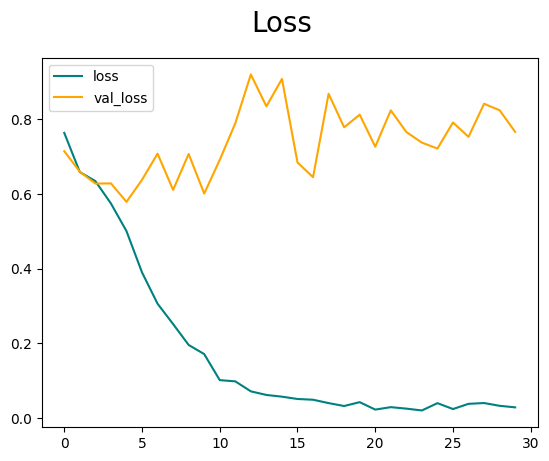

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

This code snippet generates a plot to visualize the loss during training and validation, x axis representing number of epoch, y axis represnting the loss value.



<font color='#008080'><b>Plotting Accuracy</b></font>

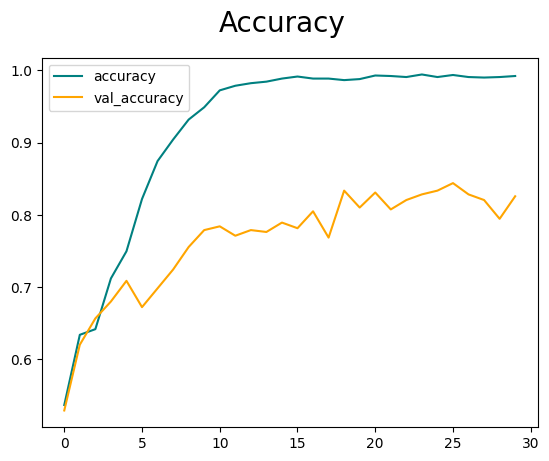

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color ='teal' , label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.legend(loc="upper left")
plt.show()

This code snippet generates a plot to visualize the accuracy during training and validation, x axis representing number of epoch, y axis represnting the accuracy.




Importing evaluation Metrics

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Initializing Metrics

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

assigning variables for precision, recall and accuracy.

**precision**: measures the accuracy of the positive predictions made by the classifier.

**recall**: measures the ability of the classifier to find all the positive samples.

**BinaryAccuracy**: same as accuracy for the overall model predections, but is more used with binary classification tasks.





Evaluating Metrics

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 461ms/step


The code snippet demonstrates how to evaluate metrics on the test dataset using the trained model, they iterating over each batch in the test dataset comparing the actual 'targeted' values and the predicted values by the model

x, y = batch, this aproach named unapacking to deal with features and labels separately.





Printing Metric Results

In [ ]:
print(pre.result(), re.result(),acc.result())

tf.Tensor(0.8095238, shape=(), dtype=float32) tf.Tensor(0.77272725, shape=(), dtype=float32) tf.Tensor(0.765625, shape=(), dtype=float32)


Displaying an Image

<function matplotlib.pyplot.show(close=None, block=None)>

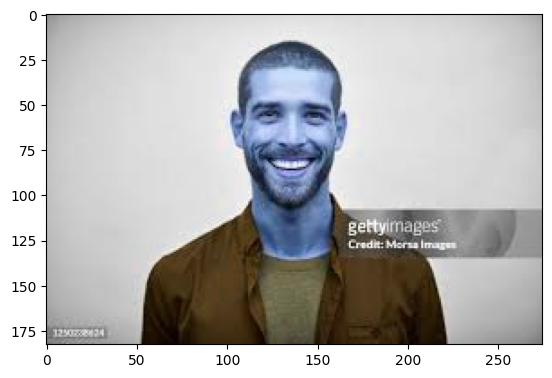

In [ ]:
img = cv2.imread('/content/images (1).jfif')
plt.imshow(img)
plt.show

The code snippet  displays an image using the OpenCV library and Matplotlib, after almost 3 trials the model recognized this photo and made the right prediction.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Resizing and Displaying an Image

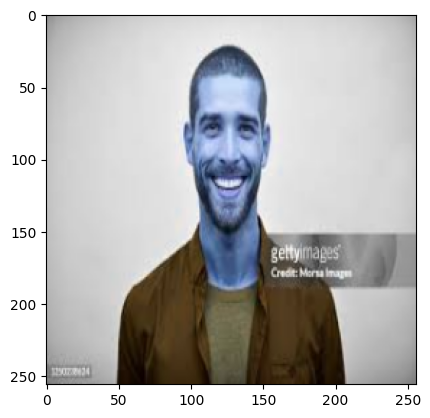

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

Performing Inference on Resized Image



In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 [==============================] - 0s 35ms/step


Predicted Output

In [ ]:
yhat

array([[0.00020953]], dtype=float32)

The code snippet above simply displays the variable yhat, which contains the predicted output for the resized image.



Predicted Class

In [ ]:
if yhat > 0.5:
    print (f'Predicted Class is Sad Face')
else:
    print (f'Predicted Class is Happy Face')

Predicted Class is Happy Face


The code snippet above checks the value of yhat and prints the predicted class based on a threshold of 0.5.



Loading a Saved Model

In [ ]:
from tensorflow.keras.models import load_model

importing load_model function from TensorFlow Keras, to save the model.



Saving a Trained Model

In [ ]:
model.save(os.path.join('imageclassifier.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



By saving your trained model, you can easily load it later using the load_model function and reuse it for inference, evaluation, or further training. This allows you to persist your trained model and use it in different environments or share it with others.

Loading a Saved Model

In [ ]:
new_model = load_model('imageclassifier.h5')

By loading a saved model, you can reuse the trained model for inference, evaluation, or further training without the need to retrain it from scratch.